In [2]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
survey_raw = pd.read_csv('data/survey_results_public.csv', index_col="ResponseId")

In [41]:
survey_raw.head()

,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,VCHostingPersonal use,VCHostingProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada,CAD\tCanadian dollar,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,macOS,Windows Subsystem for Linux (WSL),Git,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very unfavorable,Collectives on Stack Overflow;Stack Overflow f...,Daily or almost daily,Yes,Daily or almost daily,Not sure,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,5,Data scientist or machine learning specialist;...,20 to 99 employees,I have some influence,NaN,United Kingdom of Great Britain and Northern I...,GBP\tPound sterling,32000.0,Yearly,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,Angular.js,Angular;Angular.js,Pandas,.NET,NaN,NaN,Notepad++;Visual Studio,Notepad++;Visual Studio,Windows,Windows,Git,Code editor,NaN,NaN,NaN,NaN,Microsoft Teams,Microsoft Teams,Very unfavorable,Collectives on Stack Overflow;Stack Overflow;S...,Multiple times per day,Yes,Multiple times per day,Neutral,25-34 years old,Man,No,Bisexual,White,None of the above,"I have a mood or emotional disorder (e.g., dep...",No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,17,"Developer, full-stack",100 to 499 employees,I have some influence,Other (please specify):,Israel,ILS\tIsraeli new shekel,60000.0,Monthly,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,Microsoft SQL Server,Microsoft SQL Server,NaN,NaN,ASP.NET;ASP.NET Core,ASP.NET;ASP.NET Core,.NET,.NET,NaN,NaN,Notepad++;Visual Studio;Visual Studio Code,Notepad++;Visual Studio;Visual Studio Code,Windows,Windows,Git,Code editor;Command-line;Version control hosti...,NaN,

In [42]:
schema_raw = pd.read_csv('data\survey_results_schema.csv', index_col="qname")["question"]

In [43]:
schema_raw

qname
S0             <div><span style="font-size:19px;"><strong>Hel...
MetaInfo                                       Browser Meta Info
S1             <span style="font-size:22px; font-family: aria...
MainBranch     Which of the following options best describes ...
Employment     Which of the following best describes your cur...
                                     ...                        
Frequency_2    Interacting with people outside of your immedi...
Frequency_3    Encountering knowledge silos (where one indivi...
TrueFalse_1    Are you involved in supporting new hires durin...
TrueFalse_2    Do you use learning resources provided by your...
TrueFalse_3    Does your employer give you time to learn new ...
Name: question, Length: 79, dtype: object

In [44]:
schema_raw["CompTotal"]

'What is your current total compensation (salary, bonuses, and perks, before taxes and deductions)? Please enter a whole number in the box below, without any punctuation.  If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.'

In [45]:
survey_raw["CompTotal"]

ResponseId
1             NaN
2             NaN
3         32000.0
4         60000.0
5             NaN
           ...   
73264     60000.0
73265    107000.0
73266         NaN
73267     58500.0
73268         NaN
Name: CompTotal, Length: 73268, dtype: float64

In [46]:
schema_raw["CompFreq"]

'Is that compensation weekly, monthly, or yearly?'

In [47]:
survey_raw["CompFreq"]

ResponseId
1            NaN
2            NaN
3         Yearly
4        Monthly
5            NaN
          ...   
73264     Yearly
73265     Yearly
73266        NaN
73267     Yearly
73268        NaN
Name: CompFreq, Length: 73268, dtype: object

In [48]:
schema_raw.info()

<class 'pandas.core.series.Series'>
Index: 79 entries, S0 to TrueFalse_3
Series name: question
Non-Null Count  Dtype 
--------------  ----- 
79 non-null     object
dtypes: object(1)
memory usage: 3.3+ KB


In [49]:
pd.set_option('display.max_columns', 78)

In [50]:
pd.set_option('display.max_rows', 78)

In [51]:
selected_columns = [
    # 인구 통계
    'Country',
    'Age',
    'Gender',
    'EdLevel',
    # 프로그래밍 경험
    'YearsCode',
    'YearsCodePro',
    'LanguageHaveWorkedWith',
    'LanguageWantToWorkWith',
    'LearnCodeCoursesCert',
    'ProfessionalTech',
    'SOAccount',
    # 고용 관련 정보
    'Employment',
    'DevType',
    'WorkExp',
]

In [53]:
survey_df = survey_raw[selected_columns].copy()
survey_df

,Country,Age,Gender,EdLevel,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,LearnCodeCoursesCert,ProfessionalTech,SOAccount,Employment,DevType,WorkExp
ResponseId,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Canada,NaN,NaN,NaN,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time",NaN,NaN
3,United Kingdom of Great Britain and Northern I...,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14,5,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,NaN,NaN,Yes,"Employed, full-time",Data scientist or machine learning specialist;...,NaN
4,Israel,35-44 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,17,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, full-stack",NaN
5,United States of America,25-34 years old,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,3,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, front-end;Developer, full-stack;Dev...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,Nigeria,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,5,Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...,Bash/Shell;Go;JavaScript;Python;SQL;TypeScript,Udemy,DevOps function;Microservices;Developer portal...,Yes,"Employed, full-time","Developer, back-end",5.0
73265,United States of America,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,5,Bash/Shell;HTML/CSS;JavaScript;Python;SQL,HTML/CSS;JavaScript;Python,Coursera;Udemy;Udacity,None of these,Not sure/can't remember,"Employed, full-time",Data scientist or machine learning specialist,6.0
73266,United States of America,55-64 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",42,33,HTML/CSS;JavaScript;PHP;Python;SQL,C#;HTML/CSS;JavaScript;PHP;Python;SQL,Udemy;Codecademy;Pluralsight;edX,None of these,Yes,"Employed, full-time","Developer, full-stack;Developer, desktop or en...",42.0


In [54]:
print(schema_raw['YearsCode'])

Including any education, how many years have you been coding in total?


In [55]:
survey_df['YearsCode'].value_counts()

10                    5217
5                     5193
6                     4651
4                     4480
7                     4237
8                     4227
3                     4122
2                     3351
12                    2995
15                    2962
20                    2659
9                     2581
11                    1819
14                    1811
13                    1624
25                    1582
1                     1566
Less than 1 year      1413
16                    1406
30                    1330
22                    1176
18                    1150
17                    1080
40                     777
24                     752
35                     742
23                     644
19                     563
26                     489
27                     485
21                     483
28                     425
32                     371
38                     288
37                     277
34                     241
36                     236
3

In [75]:
def count_nan(_):
    return _.isna().sum()

In [76]:
count_nan(survey_df['YearsCode'])

1937

In [77]:
def count_nan2(series):
    return len(series) - series.count()

In [79]:
count_nan2(survey_df['YearsCode'])

1937

## replace 메서드  
replace(변경전 값, 변경 후 값, inplace = True)

In [101]:
survey_df['YearsCode'].replace(['Less than 1 year'], 0, inplace = True)

In [104]:
survey_df['YearsCode'].replace(['More than 50 years'], 51, inplace = True)

In [105]:
survey_df['YearsCode'].value_counts()

10    5217
5     5193
6     4651
4     4480
7     4237
8     4227
3     4122
2     3351
12    2995
15    2962
20    2659
9     2581
11    1819
14    1811
13    1624
25    1582
1     1566
0     1413
16    1406
30    1330
22    1176
18    1150
17    1080
40     777
24     752
35     742
23     644
19     563
26     489
27     485
21     483
28     425
32     371
38     288
37     277
34     241
36     236
33     229
42     216
29     208
51     172
31     170
45     167
39     159
41     143
43     115
44     104
50      68
46      57
47      42
48      41
49      35
Name: YearsCode, dtype: int64

In [106]:
survey_df['YearsCode'] = survey_df['YearsCode'].astype('float')

In [110]:
survey_df['YearsCode']

ResponseId
1         NaN
2         NaN
3        14.0
4        20.0
5         8.0
         ... 
73264     8.0
73265     6.0
73266    42.0
73267    50.0
73268    16.0
Name: YearsCode, Length: 73268, dtype: float64

In [111]:
print(schema_raw['YearsCodePro'])

NOT including education, how many years have you coded professionally (as a part of your work)?


In [112]:
count_nan(survey_df['YearsCodePro'])

21435

In [114]:
survey_df['YearsCodePro'].value_counts()

3                     4261
5                     4057
2                     3945
4                     3884
10                    3333
6                     3184
7                     2760
8                     2646
1                     2644
Less than 1 year      1972
15                    1822
12                    1711
9                     1583
20                    1472
11                    1369
14                    1048
22                     933
16                     921
13                     914
25                     877
18                     787
17                     723
30                     568
23                     463
24                     454
21                     429
19                     380
26                     320
27                     286
35                     266
28                     254
32                     223
40                     175
29                     126
33                     122
31                     121
34                     113
3

In [115]:
survey_df['YearsCodePro'].replace(['Less than 1 year'], 0, inplace = True)

In [118]:
survey_df['YearsCodePro'].replace(['More than 50 years'], 51, inplace = True)

In [119]:
survey_df['YearsCodePro'] = survey_df['YearsCodePro'].astype('float')

In [121]:
survey_df['YearsCodePro']

ResponseId
1         NaN
2         NaN
3         5.0
4        17.0
5         3.0
         ... 
73264     5.0
73265     5.0
73266    33.0
73267    31.0
73268     5.0
Name: YearsCodePro, Length: 73268, dtype: float64

In [122]:
survey_df.describe()

,YearsCode,YearsCodePro,WorkExp
count,71331.000000,51833.000000,36769.000000
mean,12.251307,9.910270,10.242378
std,9.952419,8.712048,8.706850
min,0.000000,0.000000,0.000000
25%,5.000000,4.000000,4.000000
50%,9.000000,7.000000,8.000000
75%,16.000000,14.000000,15.000000
max,51.000000,51.000000,50.000000


## to_numeric() 메서드  
수치 자료형으로 바꿀때 사용  
pandas.to_numeric(arg, errors='raise', downcast = None)  
Less than 1 year 와 More than 50 years 의 값을 NaN으로 처리함.

In [124]:
survey_df['YearsCode'] = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df['YearsCodePro'] = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')

In [125]:
schema_raw["Gender"]

'Which of the following describe you, if any? Please check all that apply.'

In [126]:
survey_df["Gender"].value_counts()

Man                                                                                   64607
Woman                                                                                  3399
Prefer not to say                                                                      1172
Non-binary, genderqueer, or gender non-conforming                                       704
Or, in your own words:                                                                  279
Man;Non-binary, genderqueer, or gender non-conforming                                   235
Man;Or, in your own words:                                                              171
Woman;Non-binary, genderqueer, or gender non-conforming                                 160
Man;Woman;Non-binary, genderqueer, or gender non-conforming                              31
Man;Woman                                                                                24
Man;Or, in your own words:;Woman;Non-binary, genderqueer, or gender non-conformi

### np.nan 값이 섞인 Series 자료형에 대해 특정 문자 값이 포함되었는지 사용할 수 있는 메서드로  
contains()가 있음.  첫 인자로 포함된 것을 찾을 문자열을 넣어줌.  
na키워드를 활용하면 NaN 값을 대신할 값을 넣을 수 있음

pandas.Series.str.contains()

In [127]:
survey_df.where(~(survey_df["Gender"].str.contains(";", na=False)), np.nan, inplace=True)

앞의 두 메서드를 활용하면 ';'를 포함하는 row를 NaN 값으로 변경할 수 있음.  
~ 은 비트 연산자로 Series 자료형의 벡터화 연산을 위해 True를 False로 False를 True로 반전해주는 역할을 함

In [128]:
survey_df

,Country,Age,Gender,EdLevel,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,LearnCodeCoursesCert,ProfessionalTech,SOAccount,Employment,DevType,WorkExp
ResponseId,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Canada,NaN,NaN,NaN,NaN,NaN,JavaScript;TypeScript,Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time",NaN,NaN
3,United Kingdom of Great Britain and Northern I...,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14.0,5.0,C#;C++;HTML/CSS;JavaScript;Python,C#;C++;HTML/CSS;JavaScript;TypeScript,NaN,NaN,Yes,"Employed, full-time",Data scientist or machine learning specialist;...,NaN
4,Israel,35-44 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20.0,17.0,C#;JavaScript;SQL;TypeScript,C#;SQL;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, full-stack",NaN
5,United States of America,25-34 years old,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8.0,3.0,C#;HTML/CSS;JavaScript;SQL;Swift;TypeScript,C#;Elixir;F#;Go;JavaScript;Rust;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, front-end;Developer, full-stack;Dev...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73264,Nigeria,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8.0,5.0,Bash/Shell;Dart;JavaScript;PHP;Python;SQL;Type...,Bash/Shell;Go;JavaScript;Python;SQL;TypeScript,Udemy,DevOps function;Microservices;Developer portal...,Yes,"Employed, full-time","Developer, back-end",5.0
73265,United States of America,25-34 years old,Man,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6.0,5.0,Bash/Shell;HTML/CSS;JavaScript;Python;SQL,HTML/CSS;JavaScript;Python,Coursera;Udemy;Udacity,None of these,Not sure/can't remember,"Employed, full-time",Data scientist or machine learning specialist,6.0
73266,United States of America,55-64 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",42.0,33.0,HTML/CSS;JavaScript;PHP;Python;SQL,C#;HTML/CSS;JavaScript;PHP;Python;SQL,Udemy;Codecademy;Pluralsight;edX,None of these,Yes,"Employed, full-time","Developer, full-stack;Developer, desktop or en...",42.0


In [129]:
survey_df["Gender"].value_counts()

Man                                                  64607
Woman                                                 3399
Prefer not to say                                     1172
Non-binary, genderqueer, or gender non-conforming      704
Or, in your own words:                                 279
Name: Gender, dtype: int64

In [130]:
survey_df["Gender"]

ResponseId
1        NaN
2        NaN
3        Man
4        Man
5        NaN
        ... 
73264    Man
73265    Man
73266    Man
73267    Man
73268    Man
Name: Gender, Length: 73268, dtype: object

In [131]:
survey_df["Gender"].unique()

array([nan, 'Man', 'Or, in your own words:', 'Woman',
       'Non-binary, genderqueer, or gender non-conforming',
       'Prefer not to say'], dtype=object)

In [132]:
sns.set_style('darkgrid')
mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.figsize']=(9,5)
mpl.rcParams['figure.facecolor'] = '#00000000'

font.size = 기본폰트의 크기 적용  
figure.figsize = 기본 figure의 사이즈를 적용  
figure.facecolor = 기본 figure 내 배경 색상을 흰색으로 적용

In [134]:
import matplotlib.font_manager as font_manager
import matplotlib as mpl
import matplotlib.pyplot as plt
# Add every font at the specified location
font_dir = ['C:/python/fonts']
for font in font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    font_manager.fontManager.addfont(font)
# Set font family globally
mpl.rcParams['font.family'] = 'NanumMyeongjo'
print(mpl.rcParams['font.family'])
mpl.rcParams['axes.unicode_minus'] = False

NanumMyeongjo
NanumMyeongjo
NanumMyeongjo
NanumMyeongjo
['NanumMyeongjo']


stack overflow의 특성상 편향된 데이터가 있음..?

In [135]:
schema_raw['Country']

'Where do you live? <span style="font-weight: bolder;">*</span>'

In [136]:
survey_df['Country'].unique()

array([nan, 'Canada',
       'United Kingdom of Great Britain and Northern Ireland', 'Israel',
       'United States of America', 'Germany', 'India', 'Netherlands',
       'Croatia', 'Australia', 'Russian Federation', 'Czech Republic',
       'Austria', 'Serbia', 'Italy', 'Ireland', 'Poland', 'Slovenia',
       'Iraq', 'Sweden', 'Madagascar', 'Norway', 'Taiwan',
       'Hong Kong (S.A.R.)', 'Mexico', 'France', 'Brazil', 'Lithuania',
       'Uruguay', 'Denmark', 'Spain', 'Egypt', 'Turkey', 'South Africa',
       'Ukraine', 'Finland', 'Romania', 'Portugal', 'Singapore', 'Oman',
       'Belgium', 'Chile', 'Bulgaria', 'Latvia', 'Philippines', 'Greece',
       'Belarus', 'Saudi Arabia', 'Kenya', 'Switzerland', 'Iceland',
       'Viet Nam', 'Thailand', 'China', 'Montenegro', 'Slovakia', 'Japan',
       'Luxembourg', 'Turkmenistan', 'Argentina', 'Hungary', 'Tunisia',
       'Bangladesh', 'Maldives', 'Dominican Republic', 'Jordan',
       'Pakistan', 'Nepal', 'Iran, Islamic Republic of...', 'I

NaN 값 포함하지 않은 Count -> nunique()

In [139]:
survey_df['Country'].nunique()

180

In [144]:
sorted_survey_df = survey_df.sort_values(by =['Country'])

In [145]:
sorted_survey_df

,Country,Age,Gender,EdLevel,YearsCode,YearsCodePro,LanguageHaveWorkedWith,LanguageWantToWorkWith,LearnCodeCoursesCert,ProfessionalTech,SOAccount,Employment,DevType,WorkExp
ResponseId,,,,,,,,,,,,,,
4503,Afghanistan,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5.0,1.0,JavaScript;Lua;Python,JavaScript;Lua;Python,NaN,None of these,Yes,"Employed, full-time","Developer, front-end;Developer, full-stack;Dev...",5.0
55394,Afghanistan,18-24 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4.0,2.0,Bash/Shell;C;C#;C++;HTML/CSS;Java;JavaScript;P...,Bash/Shell;HTML/CSS;JavaScript;Python,Udemy;Codecademy;edX,NaN,Yes,"Independent contractor, freelancer, or self-em...","Developer, full-stack;Developer, mobile",NaN
8891,Afghanistan,18-24 years old,Man,Some college/university study without earning ...,3.0,NaN,HTML/CSS;Java;JavaScript;PHP,HTML/CSS;JavaScript;PHP,Udemy;Codecademy,NaN,Yes,"Student, part-time",NaN,NaN
33329,Afghanistan,45-54 years old,Prefer not to say,"Other doctoral degree (Ph.D., Ed.D., etc.)",40.0,25.0,Assembly;C#;C++;Java;JavaScript;Perl;SQL;TypeS...,C#;C++;Java;Perl;Python;SQL;TypeScript,NaN,NaN,Yes,"Employed, full-time","Developer, full-stack",NaN
55666,Afghanistan,25-34 years old,Man,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8.0,4.0,C#;C++;Dart;HTML/CSS;Java;JavaScript;PHP;SQL;VBA,C#;C++;Dart;HTML/CSS;Java;JavaScript;Kotlin;PH...,NaN,None of these,Yes,"Independent contractor, freelancer, or self-em...",Data scientist or machine learning specialist;...,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [160]:
top_countries = survey_df['Country'].value_counts().head(15)

In [149]:
top_countries

United States of America                                13321
India                                                    6618
Germany                                                  5342
United Kingdom of Great Britain and Northern Ireland     4132
Canada                                                   2459
France                                                   2306
Brazil                                                   2088
Poland                                                   1719
Netherlands                                              1539
Spain                                                    1511
Italy                                                    1504
Australia                                                1449
Russian Federation                                       1215
Turkey                                                   1014
Sweden                                                   1008
Name: Country, dtype: int64

## xticks의 글자를 회전시키려면 rotation 키워드 인수에 각도를 의미하는 정수값을 입력하면됨.

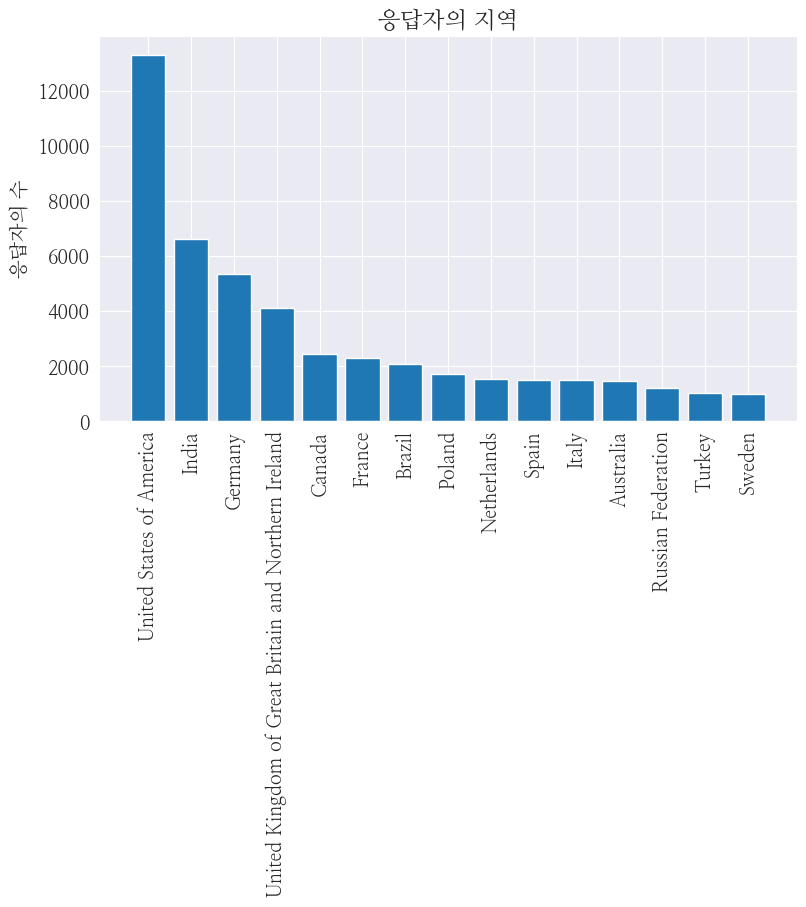

In [157]:

bar_chart = survey_df["Country"].value_counts().head(15)
bar_chart
alive = bar_chart.index
value = bar_chart.values
plt.xticks(rotation = 90)
plt.ylabel('응답자의 수')
plt.title('응답자의 지역')
plt.bar(alive, value)
plt.show()

In [158]:
top_countries = survey_df['Country'].value_counts().head(15)

<AxesSubplot:title={'center':'응답자의 지역'}, ylabel='응답자의 수'>

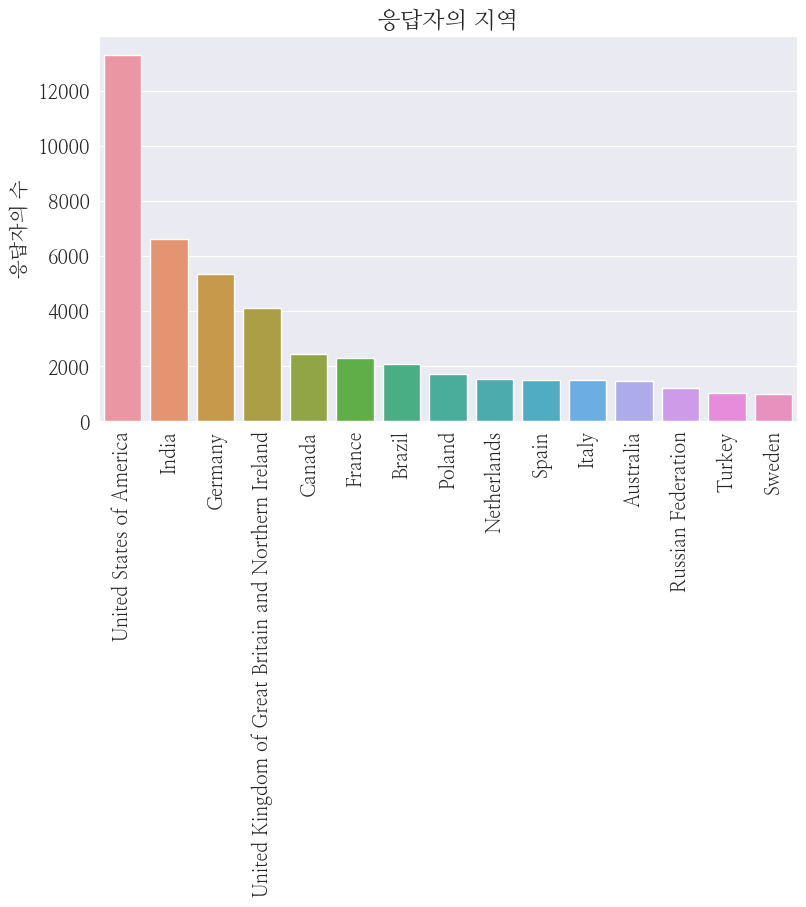

In [163]:
plt.title('응답자의 지역')
plt.ylabel('응답자의 수')
plt.xticks(rotation = 90)
sns.barplot(x=top_countries.index, y=top_countries.values)

In [164]:
count_nan(survey_df['Age'])

3011

In [165]:
age_counts = survey_df["Age"].value_counts()
age_counts

25-34 years old       27878
18-24 years old       16455
35-44 years old       13866
45-54 years old        5250
Under 18 years old     3775
55-64 years old        1974
65 years or older       547
Prefer not to say       512
Name: Age, dtype: int64

In [166]:
survey_df['Age'].unique()

array([nan, '25-34 years old', '35-44 years old', 'Under 18 years old',
       '18-24 years old', '45-54 years old', '55-64 years old',
       '65 years or older', 'Prefer not to say'], dtype=object)

In [167]:
survey_df['Age'].nunique()

8

<AxesSubplot:title={'center':'What is your age?'}, xlabel='나이', ylabel='Age'>

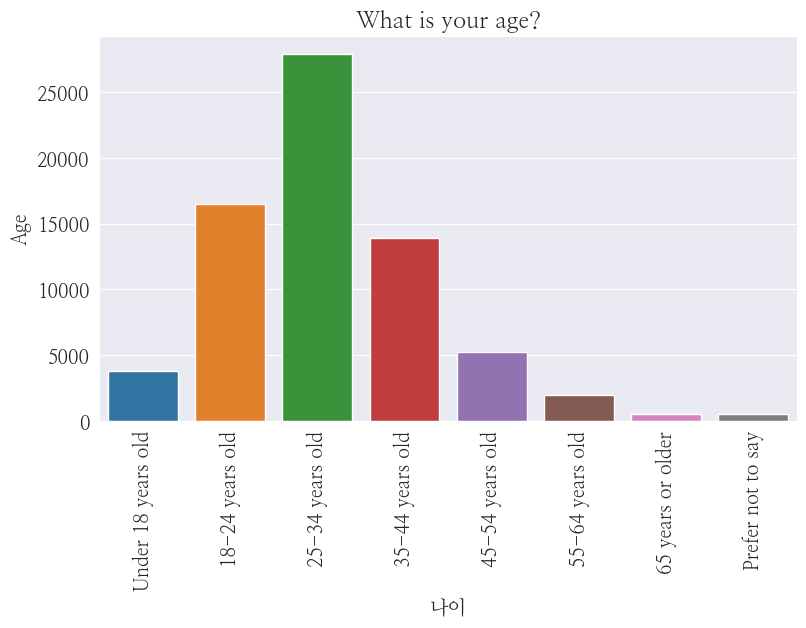

In [179]:
plt.title('What is your age?')
plt.ylabel('응답자의 수')
plt.xlabel('나이')
plt.xticks(rotation = 90)
order_list =  ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old',
                                        '45-54 years old', '55-64 years old', '65 years or older', 'Prefer not to say']
sns.barplot(x = age_counts.index, y = age_counts, order = order_list)

In [180]:
survey_df["Gender"].value_counts()

Man                                                  64607
Woman                                                 3399
Prefer not to say                                     1172
Non-binary, genderqueer, or gender non-conforming      704
Or, in your own words:                                 279
Name: Gender, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

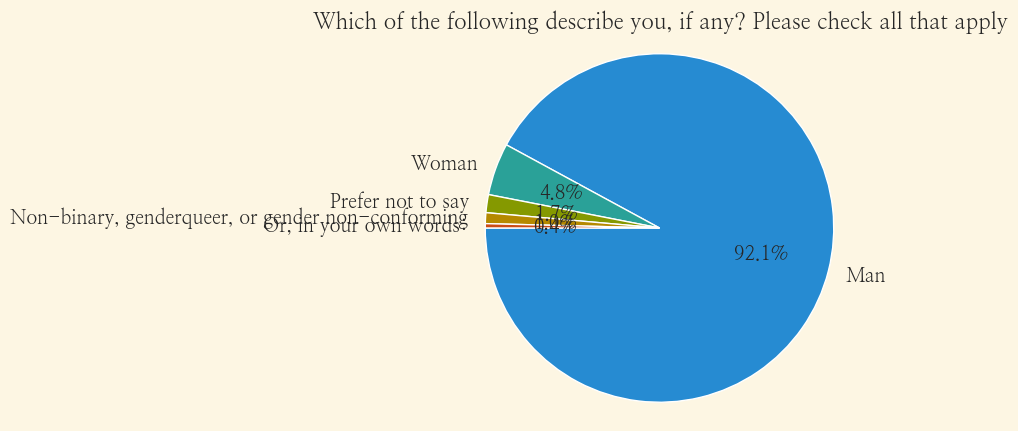

In [190]:
mpl.rcParams["axes.facecolor"]="white"
labels = ['Man', 'Woman', 'Prefer not to say', 'Non-binary, genderqueer, or gender non-conforming', 
          'Or, in your own words:']
plt.title("Which of the following describe you, if any? Please check all that apply")
plt.pie(survey_df["Gender"].value_counts(), labels = labels,
        autopct='%1.1f%%', shadow=False, startangle=180)
plt.axis('equal') # 원의 형태를 유지
plt.style.use('Solarize_Light2')
plt.show

In [191]:
schema_raw['EdLevel']

'Which of the following best describes the highest level of formal education that you’ve completed? *'

In [192]:
survey_df['EdLevel'].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          30050
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15394
Some college/university study without earning a degree                                 9194
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     7769
Associate degree (A.A., A.S., etc.)                                                    2221
Other doctoral degree (Ph.D., Ed.D., etc.)                                             2152
Primary/elementary school                                                              1767
Something else                                                                         1222
Professional degree (JD, MD, etc.)                                                     1110
Name: EdLevel, dtype: int64

<AxesSubplot:title={'center':"Which of the following best describes the highest level of formal education that you've completed?"}, xlabel='count', ylabel='EdLevel'>

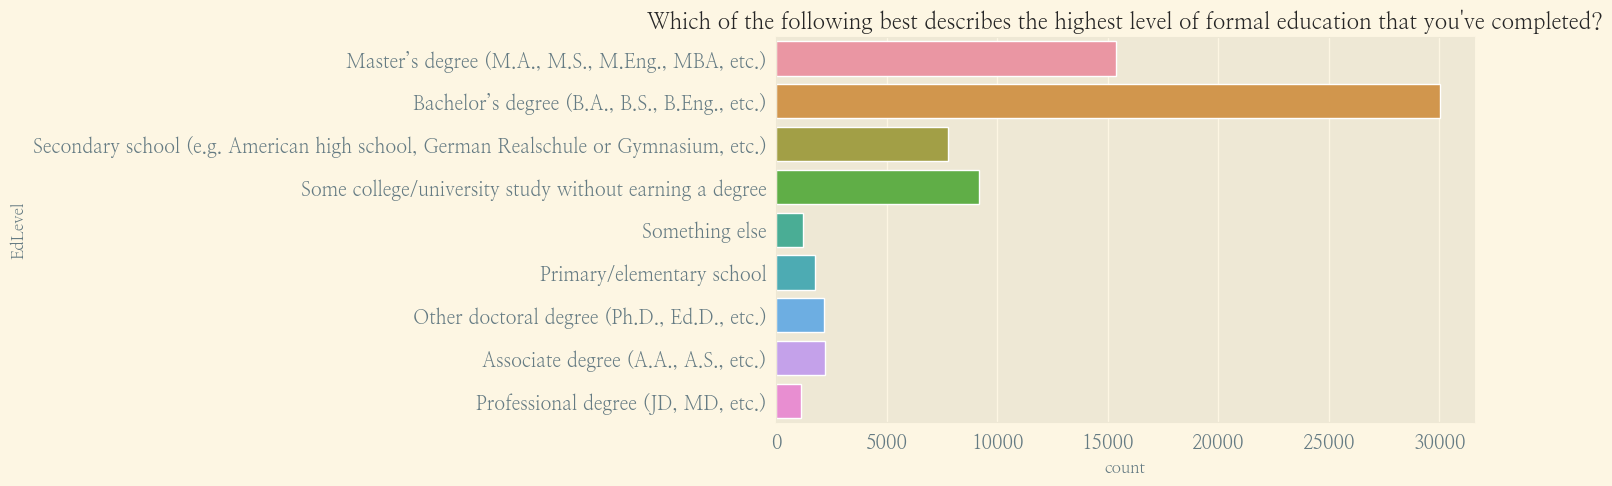

In [198]:
plt.title('Which of the following best describes the highest level of formal education that you\'ve completed?')
sns.countplot(data = survey_df, y = survey_df['EdLevel'])

Text(0.5, 0, 'Percentage')

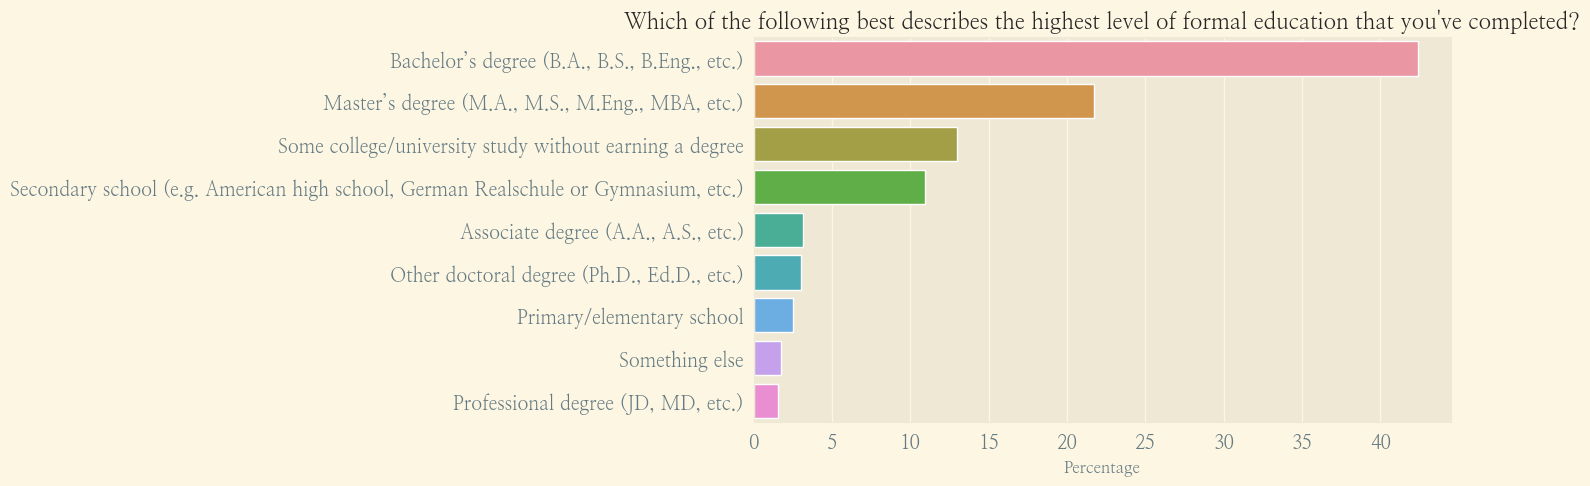

In [238]:
plt.title('Which of the following best describes the highest level of formal education that you\'ve completed?')

EdLevel_pct = survey_df.EdLevel.value_counts(True) * 100
sns.barplot(x = EdLevel_pct, y = EdLevel_pct.index)
plt.xlabel('Percentage')


## countplot 은 갯수를 헤아려줌. barplot을 이용하는 것이 더 현명한 방법이었음.

In [239]:
schema_raw['Employment']

'Which of the following best describes your current employment status?'

In [241]:
survey_df['Employment'].value_counts()

Employed, full-time                                                                                               42644
Student, full-time                                                                                                 6663
Independent contractor, freelancer, or self-employed                                                               4941
Employed, full-time;Independent contractor, freelancer, or self-employed                                           3456
Not employed, but looking for work                                                                                 1810
                                                                                                                  ...  
Student, part-time;Independent contractor, freelancer, or self-employed;Retired                                       1
Employed, full-time;Student, full-time;Student, part-time;Independent contractor, freelancer, or self-employed        1
Employed, part-time;Not employed, and no

Text(0.5, 0, 'Percentage')

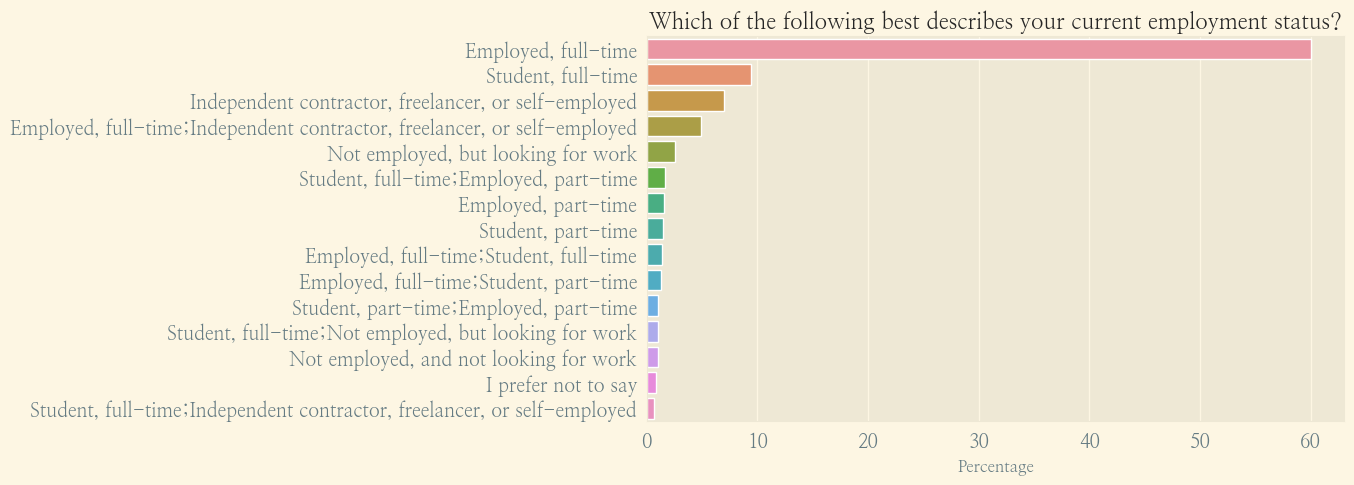

In [245]:
plt.title('Which of the following best describes your current employment status?')

Employment_pct = survey_df.Employment.value_counts(True).head(15) * 100
sns.barplot(x = Employment_pct, y = Employment_pct.index)
plt.xlabel('Percentage')
